In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing linear regression from sklearn


from IPython.display import display
# import statsmodels
from sklearn.linear_model import LinearRegression
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [36]:
#reading csv file as a dataframe
df = pd.read_csv("mpg.csv")
print(len(df))
print(df.head())

398
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:
#meanings of all columns of data 

# mpg - Milieage/Miles Per Galon
# cylinders - the power unit of the car where gasoline is turned into power
# displacement - engine displacement of the car
# horsepower - rate of the engine performance
# weight - the weight of a car
# acceleration - the acceleration of a car
# model - model of the car
# origin - the origin of the car 
# car - the name of the car

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:

#extracting the car maker name from name coloumn:
company = []
for i in range(len(df)):
    word = df["name"][i].split()
    company.append(word[0])
    
#creating a new column for car company in the dataframe
df["Company"] = company

In [6]:
# categorising the mileage per galon value of every car

mpg_level = []
for i in range(len(df)):
    value = int(df["mpg"][i])
    if value<=17:
        mpg_level.append("low")
    elif value>17 & value<29:
        mpg_level.append("medium")
    elif value>29:
        mpg_level.append("high")
    else:
        mpg_level.append("None")

In [7]:
#adding mpg_level in dataframe as a column
df["mpg_level"] = mpg_level
df["mpg_level"]

0      medium
1         low
2      medium
3         low
4         low
        ...  
393    medium
394    medium
395    medium
396    medium
397    medium
Name: mpg_level, Length: 398, dtype: object

In [10]:
#droppinng null values 
df = df.dropna()

#checking for duplicate and null values:
print('sum of duplicated values: {}\n'.format(df.duplicated().sum()))
print('sum of null values: {}'.format(df.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
Company         0
mpg_level       0
dtype: int64


In [11]:
#describing the entire dataset 
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


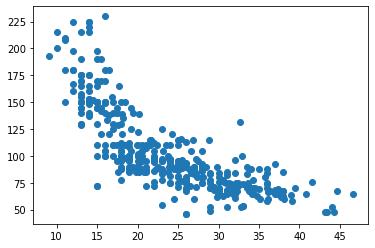

In [12]:
#relationship between horsepower and mpg column
plt.scatter(df["mpg"],df["horsepower"]);

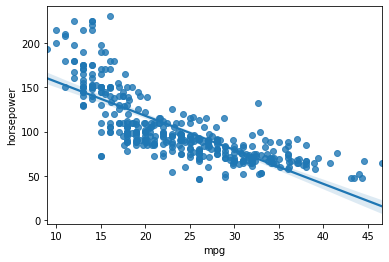

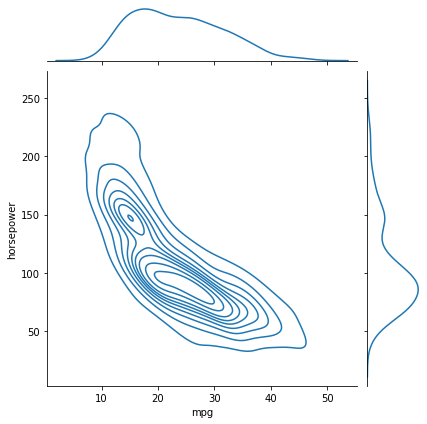

In [13]:
#To find out the relation between two variables, scatter plots have been being used for a long time.
#It is the most popular, basic, and easily understandable way of looking at a relationship between two variables.

x= df["mpg"]
y = df["horsepower"]
sns.regplot(x=x,y=y);

#To understand the data and their relationships more, make a joint plot. 
#Jointplot shows the density of the data and the distribution of both the variables at the same time.

#VISUALIZING ALONG WITH DISTRIBUTION OF EACH ON THEIR RESPECTIVE AXES
sns.jointplot(x=x,y=y,kind = 'kde');

#In this plot, it shows very clearly that the densest area is from 15 to 20 mpg. 
#While the mpg distribution is positive-skewed, the horsepower's negatively skewed. Also, both of them have some outliers.

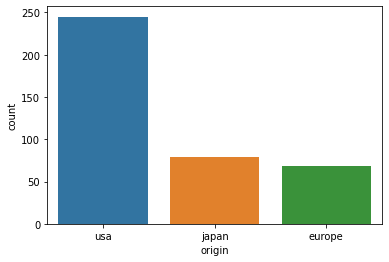

In [15]:
x = df["origin"]
sns.countplot(x=x)

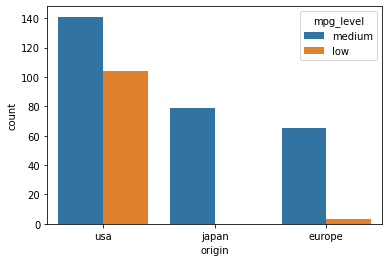

In [16]:
#how is the relationship of origin when mpg_level is applied

sns.countplot(x=df.origin,hue= df.mpg_level);

In [17]:
df["mpg"]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

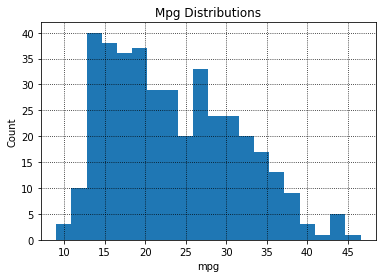

In [32]:
plt.hist(df["mpg"],bins=20)
plt.xlabel('mpg')
plt.ylabel('Count')
plt.grid(True,color='k',linestyle=":");
plt.title("Mpg Distributions");

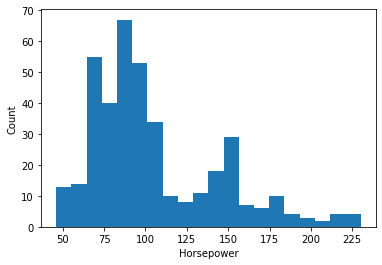

In [31]:
plt.hist(df["horsepower"],bins=20);
plt.xlabel('Horsepower');
plt.ylabel('Count');

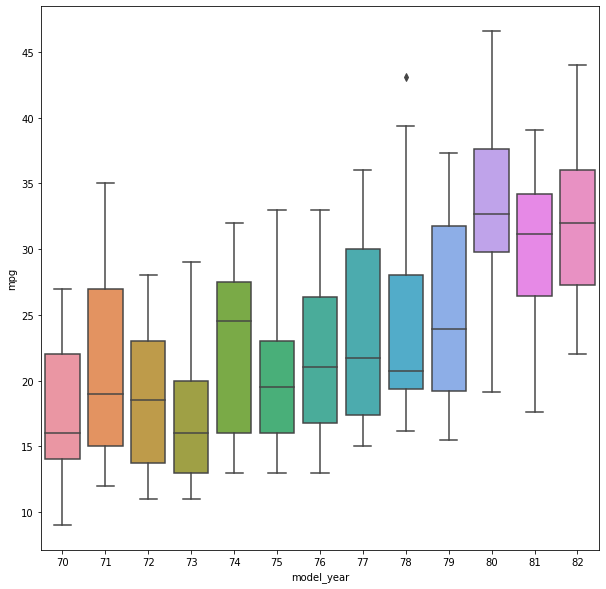

In [20]:
#Creating a line chart for model year and mpg that shows the variation on each year as a vertical line on data points

plt.figure(figsize=(10,10))
sns.boxplot(x=df.model_year,y=df.mpg);

#Variation of Mpg level for a particular year can be seen from the boxes, 
#for ex : for year 1982 , mpg has ranged between : 27-35


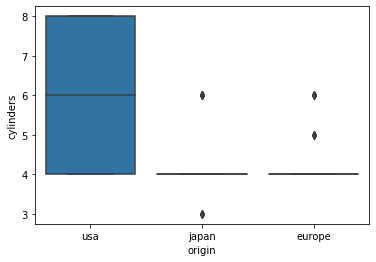

In [21]:
#How various origin values use cylinders in their respective regions
x = df.origin
y = df.cylinders
sns.boxplot(x=x,y=y);

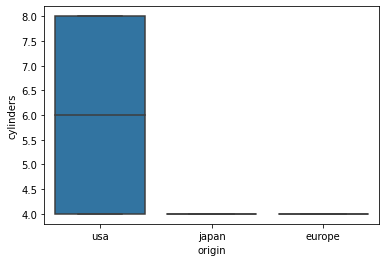

In [22]:
#to hide outliers 
x = df.origin
y = df.cylinders
sns.boxplot(x=x,y=y,showfliers=False);

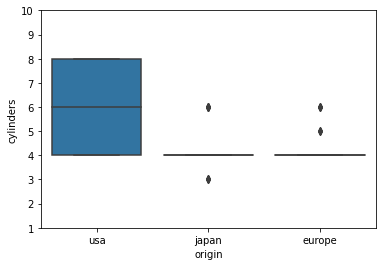

In [23]:
#Changing limits of y axis

x = df.origin;
y = df.cylinders;
plot = sns.boxplot(x=x,y=y);
plot.set(ylim=(1,10));

# 3-5 for Japan 
#4-8 for usa
#4-6 for europe

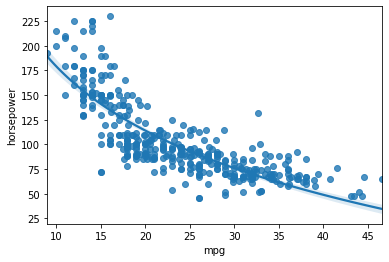

In [26]:
# critical analysis : experimenting with Ploynimial regression line

# logxbool, optional : If True, estimate a linear regression of the form y ~ log(x) 
# Note that x must be positive for this to work.

x= df["mpg"];
y = df["horsepower"];
sns.regplot(x=x,y=y,logx=True);

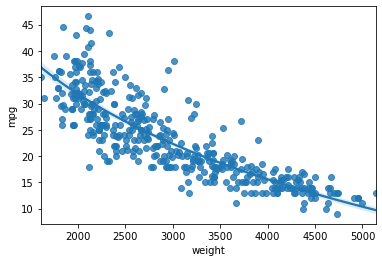

In [25]:
# Critical Polynomial Regression Line analysis for Mpg and Weight
y = df["mpg"];
x = df["weight"];
sns.regplot(x=x,y=y,logx=True);

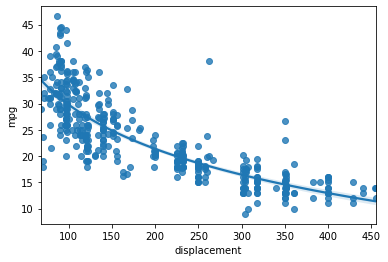

In [28]:
#Regression for mpg and displacement

y = df["mpg"];
x = df["displacement"];
sns.regplot(x=x,y=y,logx=True);

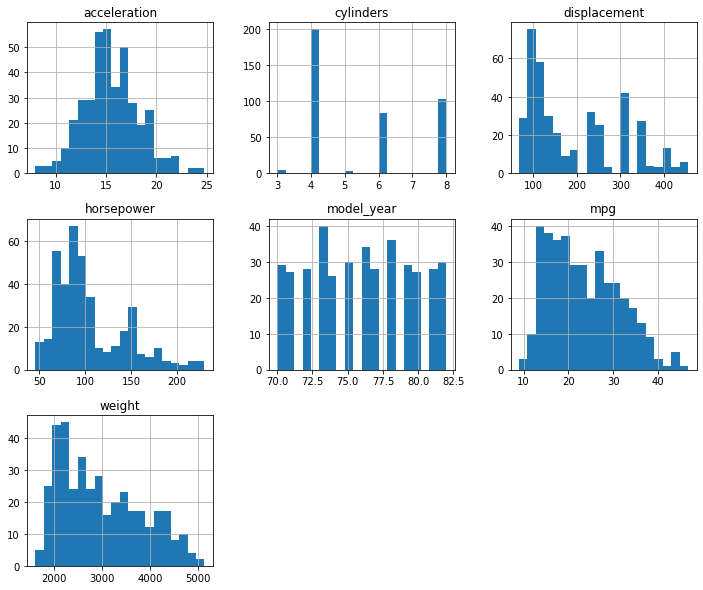

In [30]:
#Visualizing the distribution of all the features of database

df.hist(figsize=(12,10),bins=20);

In [34]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Company,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,low
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,low
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,low


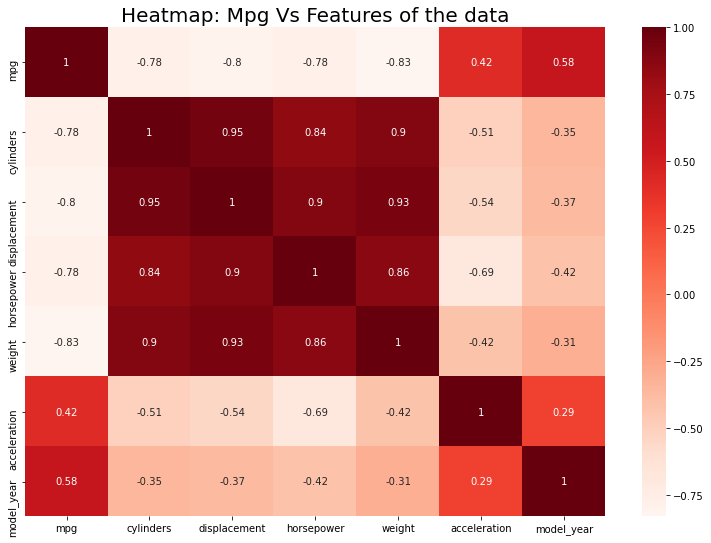

In [52]:
#Visualizing Relationship of Mpg of car with other features

plt.figure(figsize=(13,9))
 
#cmap : colormap , annot : annotate point (x,y) with label
plt.title('Heatmap: Mpg Vs Features of the data',fontsize=20);